# Object detectin using template matching 7_13_2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

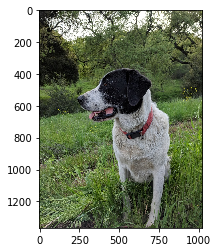

In [11]:
# This is the original 'full' that is read in

full = cv2.imread('./original/Computer-Vision-with-Python/DATA/sammy.png')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

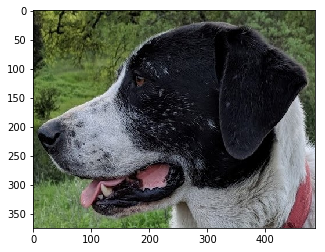

In [12]:
face = cv2.imread('./original/Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)


In [13]:
face.shape

(375, 486, 3)

In [14]:
full.shape

(1367, 1025, 3)

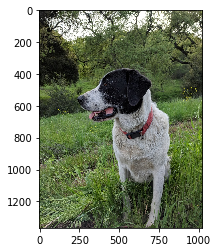

In [15]:
copy_version = full.copy()
plt.imshow(copy_version)

In [6]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# matched location for cvw.TM_CCOEFF for example will be in heat map showing where the match may be...

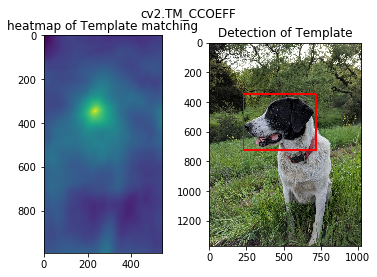

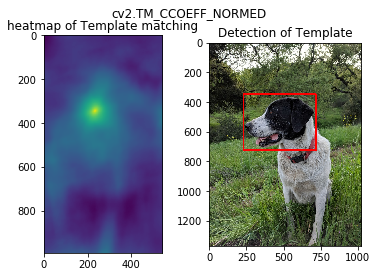

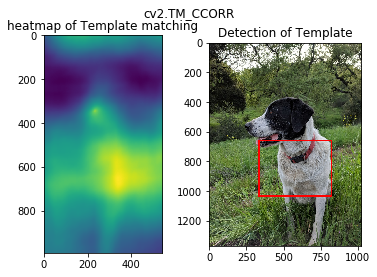

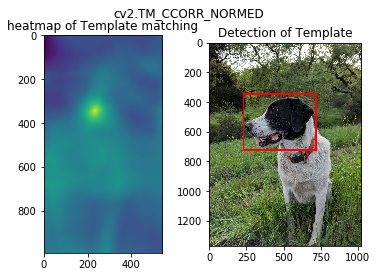

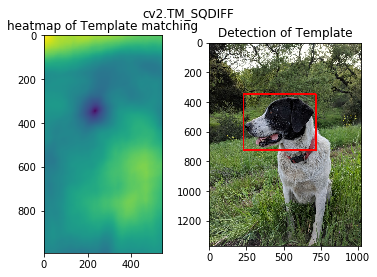

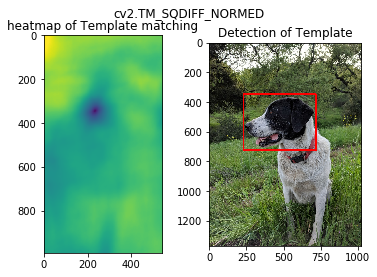

In [17]:
# each m will be a method object inside a mothods, which is a list that holds methods 

for m in methods:
    full_copy = full.copy()
    plt.imshow(full_copy)
    method = eval(m)    #when an object is passed in as an object, you have to use eval to run it.  
    
    # Matching 
    # cv2.matchTemplate(1.full_image to scan through, 2.what you are looking for, 3.method of matching to use)
    
    res = cv2.matchTemplate(full_copy,face,method)   
    
    min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    '''
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_location    
    else:
        top_left = max_location
    '''
    height, width, channels = face.shape
    
    #print('face: ' + face + ' width: ' + width + ' channels: ' + channels)   ##this is to test
    
    
      
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    
    cv2.rectangle(full_copy, top_left, bottom_right,(255,0,0),10)
    
    #plot and show images 
    
    plt.subplot(121)   # This means 1 row, 2 column and grab the first == 1  hence 121
    plt.imshow(res)
    plt.title('heatmap of Template matching')
   
 #############################################################################
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')
    
    

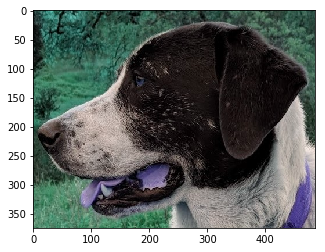

In [9]:
full_copy = full.copy()
plt.imshow(full_copy)

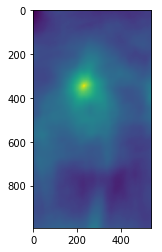

In [18]:
my_method = eval('cv2.TM_CCOEFF')
res2 = cv2.matchTemplate(full_copy,face, my_method)
plt.imshow(res2)